In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Wczytanie i przegląd danych

In [21]:
df = pd.read_excel('PM_BDG.xlsx', names = ['Date', 'PM25'], skiprows = 5, index_col = 'Date')
df.index = pd.to_datetime(df.index)

In [11]:
df

,PM 2.5 [ug/m3]
Date,
2022-01-01,4.934921
2022-01-02,10.341562
2022-01-03,5.007348
2022-01-04,9.688094
2022-01-05,5.914476
...,...
2022-12-27,2.195314
2022-12-28,4.317930
2022-12-29,5.061757


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PM 2.5 [ug/m3]  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [14]:
df.describe()

,PM 2.5 [ug/m3]
count,365.000000
mean,13.388558
std,9.827103
min,1.705395
25%,6.712919
50%,10.522706
75%,16.328249
max,65.242437


In [24]:
pd.set_option('mode.use_inf_as_null', True)
fig, ax = plt.subplots(1,1,figsize=(15,6))
sns.lineplot(x=df.index, y=df['PM25'],ax=ax,data=df)

plt.show()


OptionError: No such keys(s): 'mode.use_inf_as_null'

## 2. Zbiór cech

In [25]:
stats = ["mean", "std", "max", "min"]

### 2.1 Okna czasowe typu rolling

OptionError: No such keys(s): 'mode.use_inf_as_null'

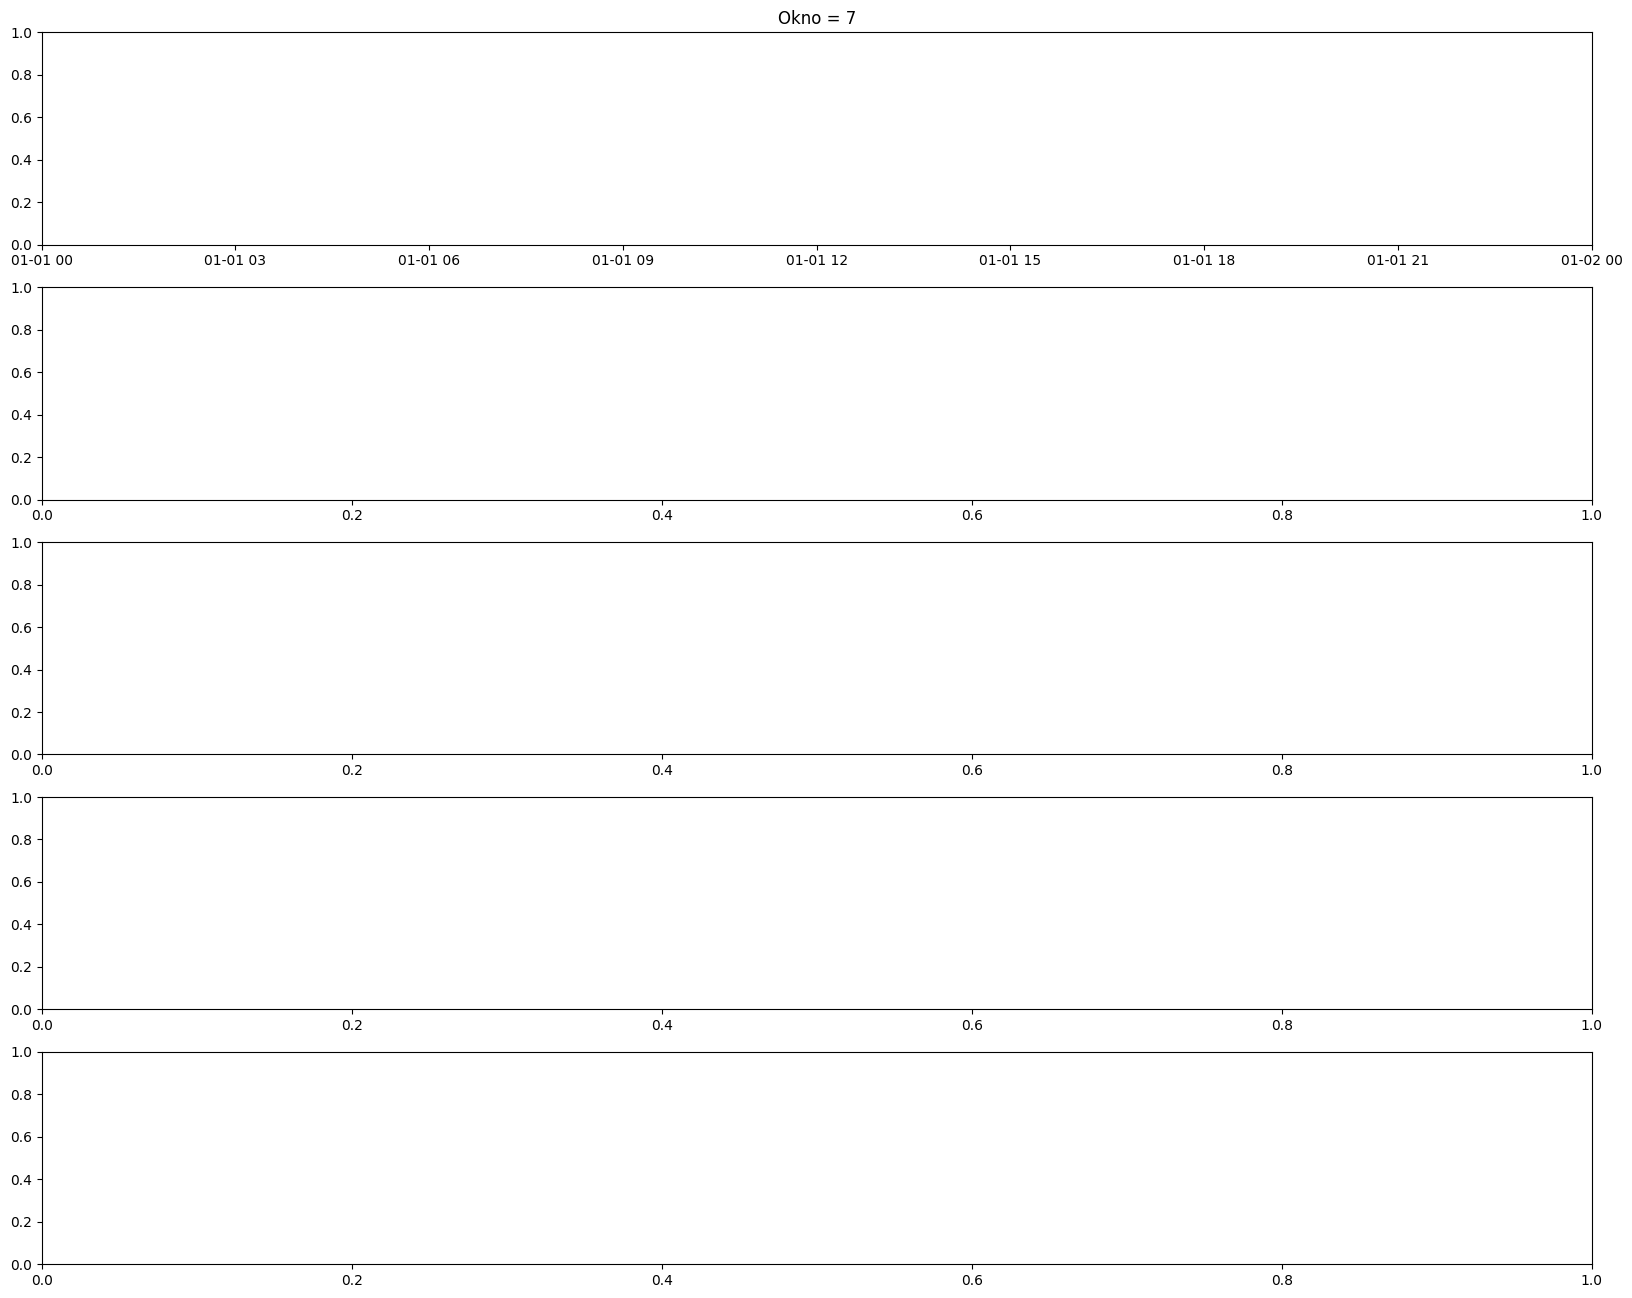

In [26]:
windows = [7, 14, 30]
for window in windows:
    rolling_df = data.rolling(window=window).agg(stats)
    fig, axes = plt.subplots(5, 1, figsize = [20, 16])
    axes[0].set_title(f'Okno = {window}')
    sns.lineplot(data = rolling_df, x = rolling_df.index, y = ('PM 2.5 [ug/m3]', 'mean'), ax = axes[0], color = 'red', label = 'Średnia')
    axes[0].grid()
    axes[0].set_xlim(np.min(data.index), np.max(data.index))
    axes[0].set_ylabel('Wartość PM2.5 [ug/m3]')
    
    sns.lineplot(data = rolling_df, x = rolling_df.index, y = ('PM 2.5 [ug/m3]', 'median'), ax = axes[1], color = 'blue', label = 'Mediana')
    axes[1].grid()
    axes[1].set_xlim(np.min(data.index), np.max(data.index))
    axes[1].set_ylabel('Wartość PM2.5 [ug/m3]')
    
    sns.lineplot(data = rolling_df, x = rolling_df.index, y = ('PM 2.5 [ug/m3]', 'std'), ax = axes[2], color = 'gold', label = 'Odchylenie standardowe')
    axes[2].grid()
    axes[2].set_xlim(np.min(data.index), np.max(data.index))
    axes[2].set_ylabel('Wartość PM2.5 [ug/m3]')
    
    sns.lineplot(data = rolling_df, x = rolling_df.index, y = ('PM 2.5 [ug/m3]', 'min'), ax = axes[3], color = 'green', label = 'Max')
    axes[3].grid()
    axes[3].set_xlim(np.min(data.index), np.max(data.index))
    axes[3].set_ylabel('Wartość PM2.5 [ug/m3]')
    
    sns.lineplot(data = rolling_df, x = rolling_df.index, y = ('PM 2.5 [ug/m3]', 'max'), ax = axes[4], color = 'orange', label = 'Min')
    axes[4].grid()
    axes[4].set_xlim(np.min(data.index), np.max(data.index))
    axes[4].set_ylabel('Wartość PM2.5 [ug/m3]')

In [9]:
rolling = data.rolling(window = 14).agg(stats)
data['Mean'] = rolling['PM 2.5 [ug/m3]', 'mean']
data['Median'] = rolling['PM 2.5 [ug/m3]', 'median']
data['Std'] = rolling['PM 2.5 [ug/m3]', 'std']
data['Min'] = rolling['PM 2.5 [ug/m3]', 'min']
data['Max'] = rolling['PM 2.5 [ug/m3]', 'max']

### 2.2 Okna czasowe typu expanding

Text(0, 0.5, 'Wartość PM2.5 [ug/m3]')

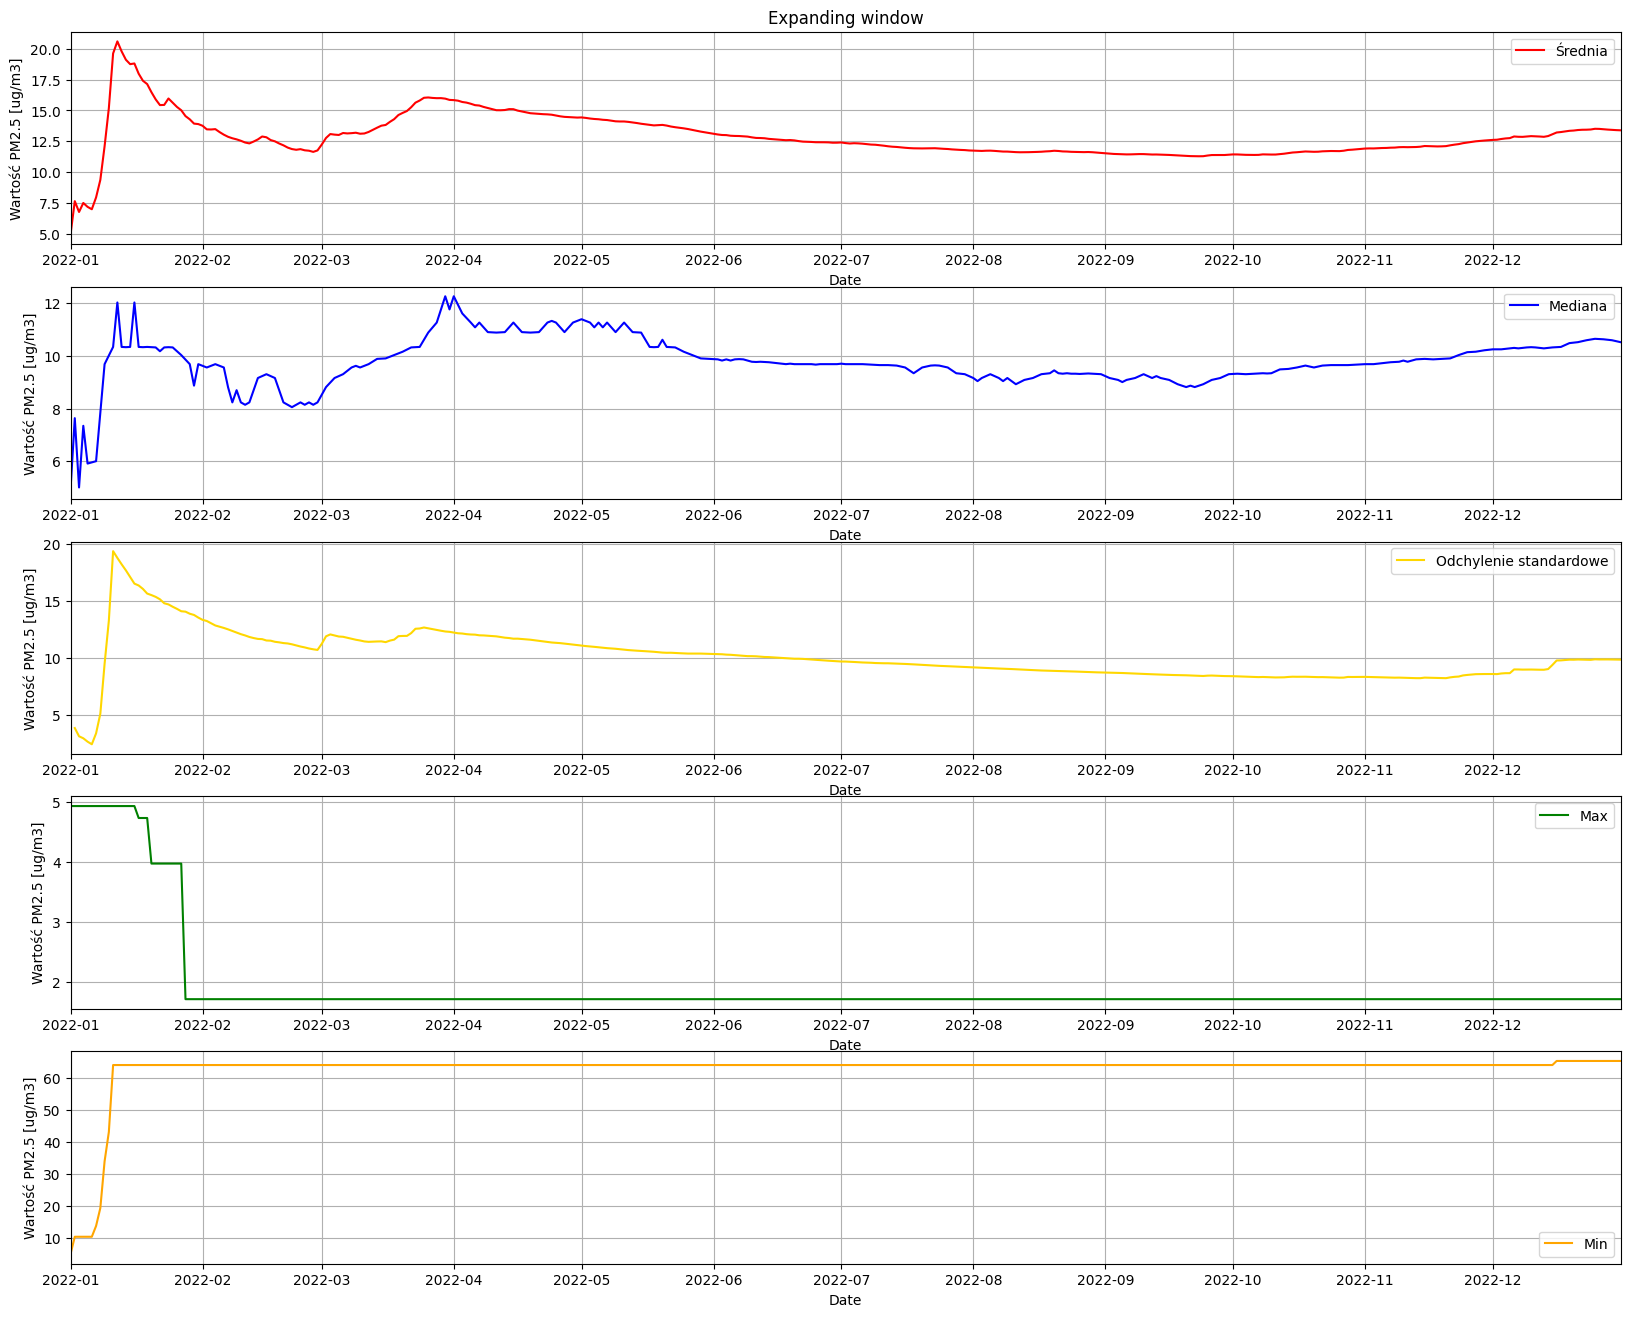

In [11]:
expanding_df = data.expanding().agg(stats)
fig, axes = plt.subplots(5, 1, figsize = [20, 16])
axes[0].set_title(f'Expanding window')
sns.lineplot(data = expanding_df, x = expanding_df.index, y = ('PM 2.5 [ug/m3]', 'mean'), ax = axes[0], color = 'red', label = 'Średnia')
axes[0].grid()
axes[0].set_xlim(np.min(data.index), np.max(data.index))
axes[0].set_ylabel('Wartość PM2.5 [ug/m3]')
    
sns.lineplot(data = expanding_df, x = expanding_df.index, y = ('PM 2.5 [ug/m3]', 'median'), ax = axes[1], color = 'blue', label = 'Mediana')
axes[1].grid()
axes[1].set_xlim(np.min(data.index), np.max(data.index))
axes[1].set_ylabel('Wartość PM2.5 [ug/m3]')
    
sns.lineplot(data = expanding_df, x = expanding_df.index, y = ('PM 2.5 [ug/m3]', 'std'), ax = axes[2], color = 'gold', label = 'Odchylenie standardowe')
axes[2].grid()
axes[2].set_xlim(np.min(data.index), np.max(data.index))
axes[2].set_ylabel('Wartość PM2.5 [ug/m3]')
    
sns.lineplot(data = expanding_df, x = expanding_df.index, y = ('PM 2.5 [ug/m3]', 'min'), ax = axes[3], color = 'green', label = 'Max')
axes[3].grid()
axes[3].set_xlim(np.min(data.index), np.max(data.index))
axes[3].set_ylabel('Wartość PM2.5 [ug/m3]')
    
sns.lineplot(data = expanding_df, x = expanding_df.index, y = ('PM 2.5 [ug/m3]', 'max'), ax = axes[4], color = 'orange', label = 'Min')
axes[4].grid()
axes[4].set_xlim(np.min(data.index), np.max(data.index))
axes[4].set_ylabel('Wartość PM2.5 [ug/m3]')

### 2.3 Okna czasowe typu nested

In [34]:
nested_windows = [(7, 14), (7, 30), (14, 30)]
for outer_window, inner_window in nested_windows:
    outer_stats = df.rolling(window=outer_window).agg(stats)
    nested_df = outer_stats.rolling(window=inner_window).agg(stats)
    


PM25                                                       \
                 mean                                        std             
                 mean       std        max        min       mean       std   
Date                                                                         
2022-01-01        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-02        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-03        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-04        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-05        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-06        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-07        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-08        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-09        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-10        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-11        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-12        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-13        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-14        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-15        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-16        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-17        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-18        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-19        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-20        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-21        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-22        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-23        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-24        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-25        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-26        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-27        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-28        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-29        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-30        NaN       NaN        NaN        NaN        NaN       NaN   
2022-01-31        NaN       NaN        NaN        NaN        NaN       NaN   
2022-02-01        NaN       NaN        NaN        NaN        NaN       NaN   
2022-02-02  14.096325  0.143569  14.191877  13.931228  13.683453  0.057037   
2022-02-03  14.164461  0.028147  14.191877  14.135635  13.659321  0.015652   
2022-02-04  14.183816  0.059228  14.249941  14.135635  13.661372  0.013355   
2022-02-05  14.306795  0.205571  14.534810  14.135635  13.630291  0.060758   
2022-02-06  14.427357  0.154786  14.534810  14.249941  13.600528  0.046920   
2022-02-07  14.417692  0.171416  14.534810  14.220944  13.612277  0.066715   
2022-02-08  14.170344  0.354993  14.497321  13.792766  13.666308  0.070595   
2022-02-09  13.650242  0.653722  14.220944  12.937016  13.542841  0.282708   

                                                                        \
                                        max                              
                  max        min       mean  std        max        min   
Date                                                                     
2022-01-01        NaN        NaN        NaN  NaN        NaN        NaN   
2022-01-02        NaN        NaN        NaN  NaN        NaN        NaN   
2022-01-03        NaN        NaN        NaN  NaN        NaN        NaN   
2022-01-04        NaN        NaN        NaN  NaN        NaN       

### 2.4 Wartości opóznione bazując na ACF

Text(0, 0.5, 'Wartość ACF')

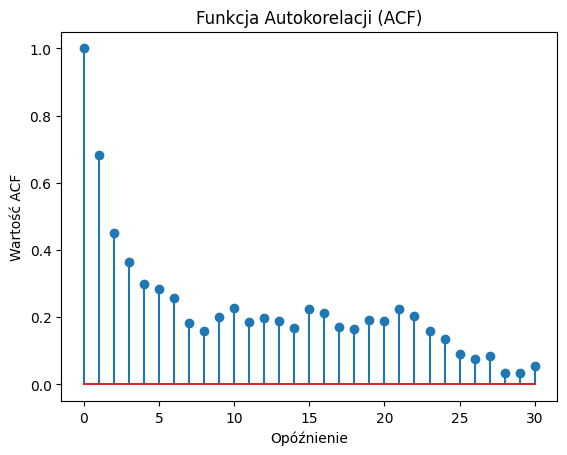

In [15]:
acf = sm.tsa.acf(data["PM 2.5 [ug/m3]"], nlags = 30)

plt.stem(range(len(acf)), acf)
plt.title("Funkcja Autokorelacji (ACF)")
plt.xlabel("Opóźnienie")
plt.ylabel("Wartość ACF")

### 2.5 Wartości wynikające z daty

In [17]:
data["DayOfWeek"] = data.index.dayofweek
data["Month"] = data.index.month
data["DayOfYear"] = data.index.dayofyear

### 2.6 STL

OptionError: No such keys(s): 'mode.use_inf_as_null'

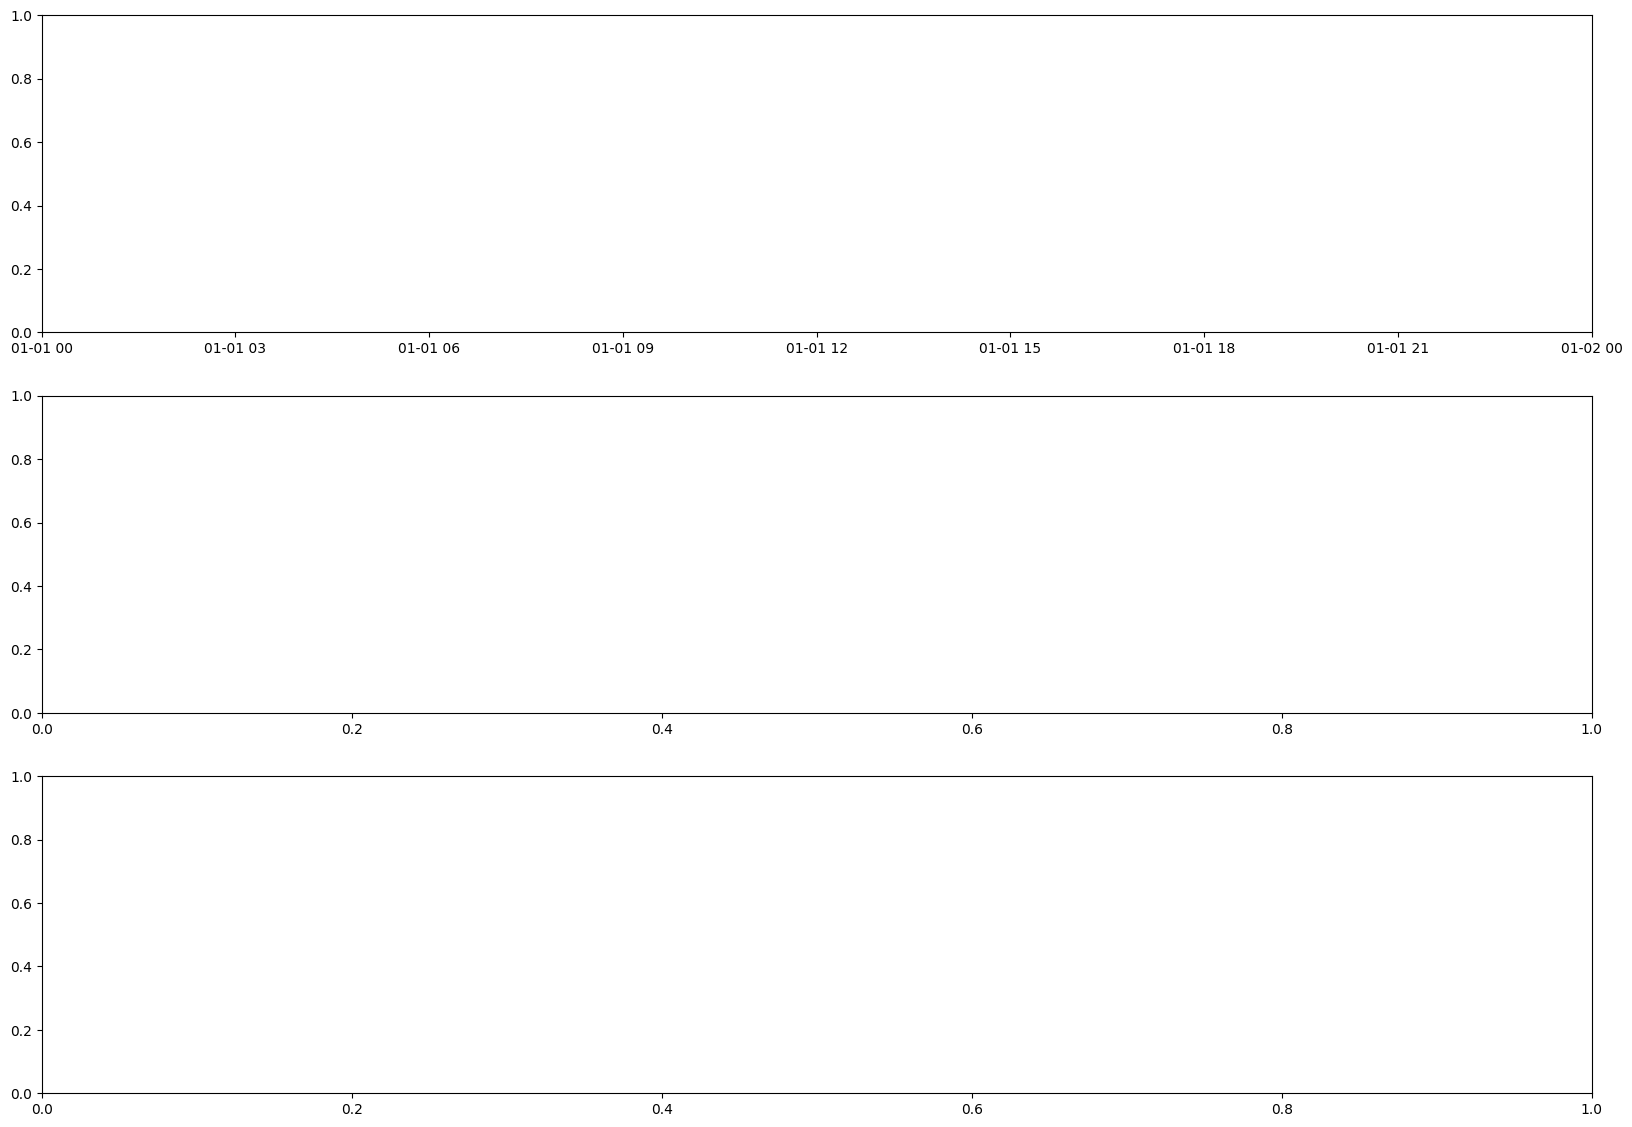

In [37]:
result = STL(df['PM25'], period = 365, seasonal = 5).fit()
df['Trend'], df['Seasonal'], df['Resid'] = result.trend, result.seasonal, result.resid

fig, axes = plt.subplots(3, 1, figsize = [20, 14])
sns.lineplot(df, x = df.index,  y = df['PM25'], ax = axes[0], color = 'blue', label = 'PM2.5 [ug/m3]')
sns.lineplot(df, x = df.index,  y = df['Trend'], ax = axes[0], color = 'red', label = 'Trend')

axes[0].set_ylabel('PM25')
axes[0].grid()
axes[0].set_title('Sezonowość - trendy - resiuda')
axes[0].set_xlim(np.min(df.index), np.max(df.index))

sns.lineplot(df, x = df.index,  y = df['Seasonal'], ax = axes[1], color = 'green', label = 'Sezonowość')
axes[1].set_ylabel('PM25')
axes[1].grid()
axes[1].set_xlim(np.min(df.index), np.max(df.index))

sns.lineplot(df, x = df.index,  y = df['Resid'], ax = axes[2], color = 'gold', label = 'Residua')
axes[2].set_ylabel('PM25')
axes[2].grid()
axes[2].set_xlim(np.min(df.index), np.max(df.index))

In [20]:
data

,PM 2.5 [ug/m3],Mean,Median,Std,Min,Max,DayOfWeek,Month,DayOfYear,Trend,Seasonal,Resid
Date,,,,,,,,,,,,
2022-01-01,4.934921,NaN,NaN,NaN,NaN,NaN,5,1,1,24.212075,-17.424580,-1.852574
2022-01-02,10.341562,NaN,NaN,NaN,NaN,NaN,6,1,2,23.920994,-12.747473,-0.831959
2022-01-03,5.007348,NaN,NaN,NaN,NaN,NaN,0,1,3,23.603979,-15.349300,-3.247331
2022-01-04,9.688094,NaN,NaN,NaN,NaN,NaN,1,1,4,23.258334,-8.882773,-4.687467
2022-01-05,5.914476,NaN,NaN,NaN,NaN,NaN,2,1,5,22.882371,-16.434513,-0.533382
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.195314,28.624122,27.105343,17.358268,2.195314,65.242437,1,12,361,12.521737,2.098572,-12.424995
2022-12-28,4.317930,26.482004,23.458649,18.420872,2.195314,65.242437,2,12,362,10.721940,6.884442,-13.288452
2022-12-29,5.061757,22.437507,21.018141,16.176562,2.195314,65.242437,3,12,363,8.870863,-4.102361,0.293255


## 3. Przedstaw uzyskany zbiór cech na w przejrzysty sposób na wykresach i opisz co można na ich podstawie zinterpretować.

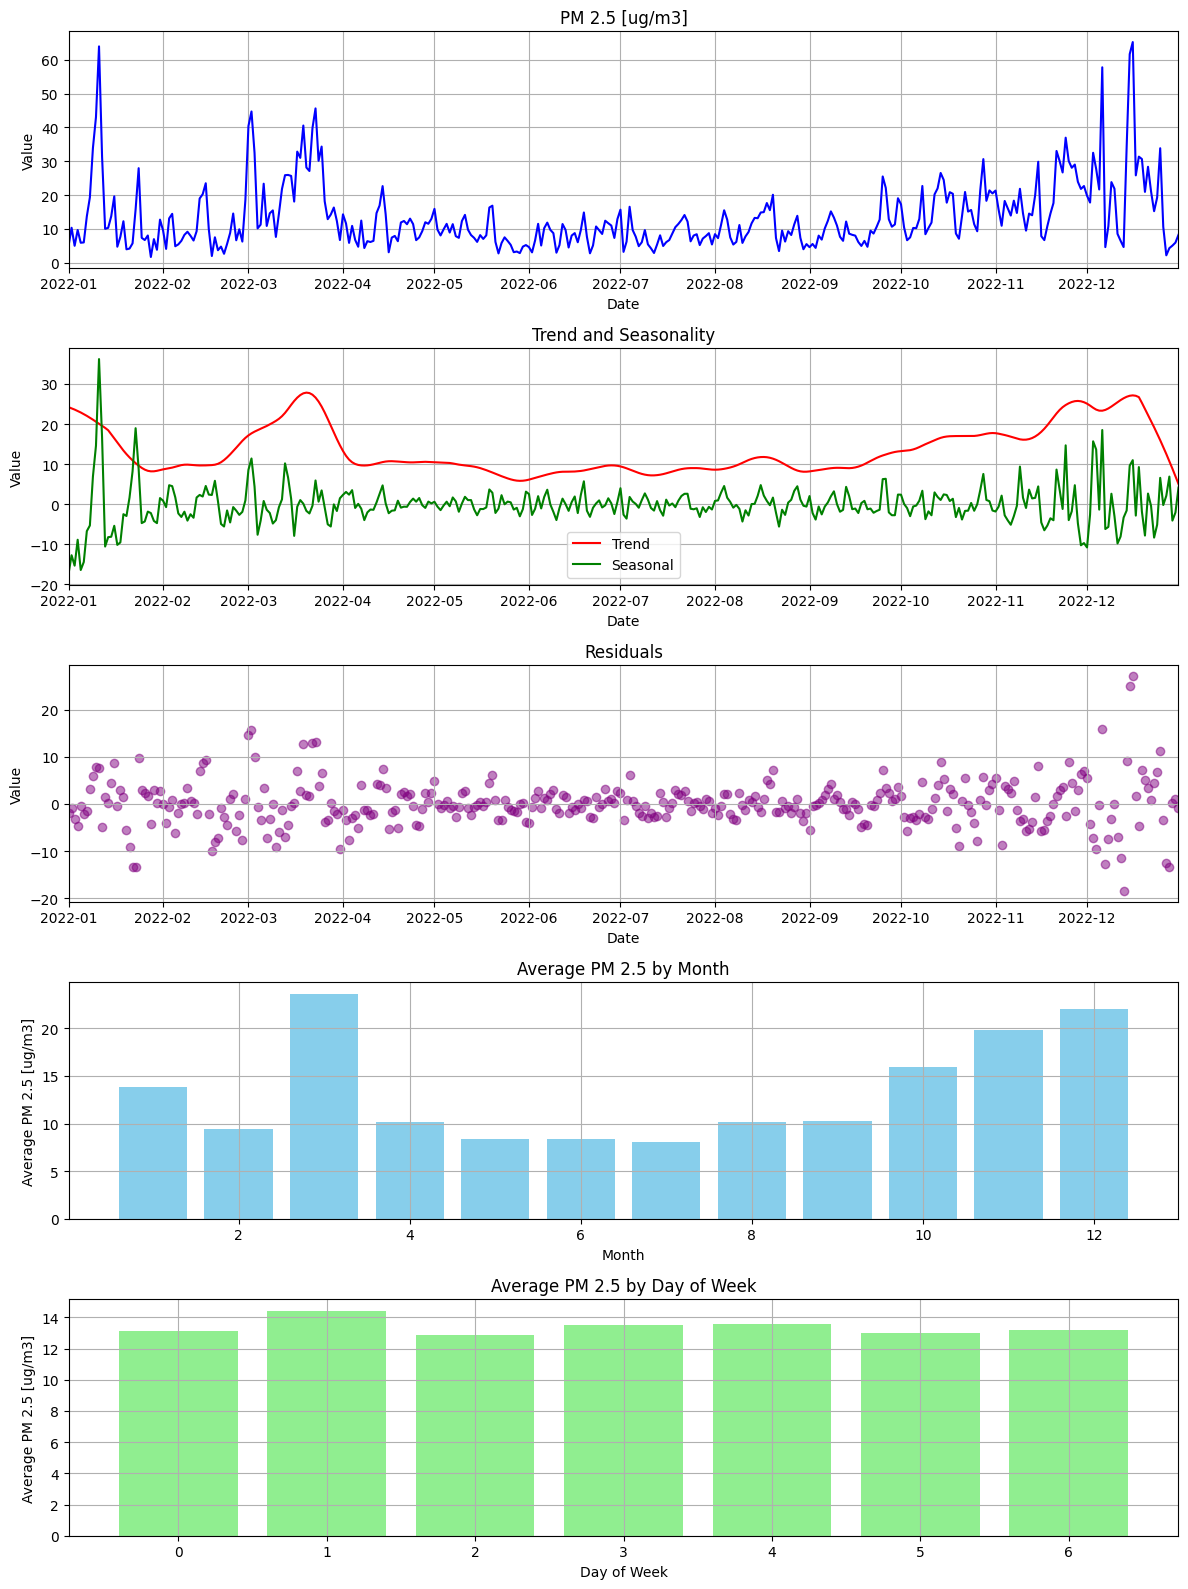

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(12, 16))

axes[0].plot(data.index, data["PM 2.5 [ug/m3]"], color="blue")
axes[0].set_title("PM 2.5 [ug/m3]")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Value")
axes[0].set_xlim(np.min(data.index), np.max(data.index))
axes[0].grid()

axes[1].plot(data.index, data["Trend"], color="red", label="Trend")
axes[1].plot(data.index, data["Seasonal"], color="green", label="Seasonal")
axes[1].set_title("Trend and Seasonality")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Value")
axes[1].set_xlim(np.min(data.index), np.max(data.index))
axes[1].grid()
axes[1].legend()

axes[2].scatter(data.index, data["Resid"], color="purple", alpha=0.5)
axes[2].set_title("Residuals")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Value")
axes[2].set_xlim(np.min(data.index), np.max(data.index))
axes[2].grid()

monthly_avg = data.groupby(data.index.month)["PM 2.5 [ug/m3]"].mean()
axes[3].bar(monthly_avg.index, monthly_avg, color="skyblue")
axes[3].set_title("Average PM 2.5 by Month")
axes[3].set_xlabel("Month")
axes[3].set_ylabel("Average PM 2.5 [ug/m3]")
axes[3].grid()

dayofweek_avg = data.groupby(data.index.dayofweek)["PM 2.5 [ug/m3]"].mean()
axes[4].bar(dayofweek_avg.index, dayofweek_avg, color="lightgreen")
axes[4].set_title("Average PM 2.5 by Day of Week")
axes[4].set_xlabel("Day of Week")
axes[4].set_ylabel("Average PM 2.5 [ug/m3]")
axes[4].grid()

plt.tight_layout()

Przedstawione powyżej wykresy zbierają otrzymane informację o cechach stworzonych dla zbioru, dzięki nim widzimy jak rozkładają się wartości PM2.5 na przestrzeni roku. Dodatkowo ukazana jest sezonowść oraz trend. Ostatnie dwa wkresy to rozkład średniej wartości PM2.5 w poszczególnym miesiącu - pokazuję nam to ciekawe wnioski o zmianie średniej w miesiącu - dużych wartościach w okresie marca oraz pażdziernik - grudzień oraz wykres średniej wartości pyłków z podziałem na dzien tygodnia - w miarę równomierny rozkład.

In [24]:
data.to_csv('pm25_fe.csv')